In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')


def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [3]:
tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Old Guard"))].sort_values(by='cached_count', ascending=False)

,id,type,name,canonical,cached_count,merger_id
11565790,44512552,Fandom,The Old Guard (Movie 2020),True,7263,NaN
5088015,18664431,Fandom,The Old Guard (Comics),True,930,NaN
12553187,48288328,Fandom,The Old Guard (Movie 2020) RPF,True,37,NaN
11538968,44411317,Fandom,The Old Guard (2020 Movie),False,20,44512552.0
11160242,42944194,Fandom,The Old Guard (Comic),False,12,18664431.0
11539426,44413048,Fandom,The Old Guard - Fandom,False,11,44512552.0
11557976,44483275,Fandom,The Old Guard (2020),False,10,44512552.0


In [4]:
og_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Old Guard"))].sort_values(by='cached_count', ascending=False)['id'].values[0]
og_tag2 = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Old Guard"))].sort_values(by='cached_count', ascending=False)['id'].values[1]
og_works = works.loc[(works['tags'].astype('string').str.contains(str(og_tag)))]
og_works['year'] = og_works['creation date'].str[:4]
og_works['month'] = og_works['creation date'].str[5:7]
og_works['sm_date'] = og_works['creation date'].str[0:7]
og_works.sort_values(by='sm_date')
og_works2 = works.loc[works['tags'].astype('string').str.contains(str(og_tag2))]
og_works2['year'] = og_works2['creation date'].str[:4]
og_works2['month'] = og_works2['creation date'].str[5:7]
og_works2['sm_date'] = og_works2['creation date'].str[0:7]
og_works2.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\480574348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_works['year'] = og_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\480574348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_works['month'] = og_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\480574348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
1826007,2020-02-02,en,False,False,18126.0,9+7266+26694209+116+22+21+23+2246+24+143795+96...,NaN,2020,02,2020-02
1334039,2020-06-02,en,False,True,100.0,11+663+60+1032615+23+16+44411320+44411323+4313...,NaN,2020,06,2020-06
1213572,2020-06-30,en,False,True,1171.0,11+38827+30558+44030995+23+16+44411320+4313793...,NaN,2020,06,2020-06
1169248,2020-07-09,en,False,True,3327.0,11+60+238+150127+7002+44391757+23+16+44411320+...,NaN,2020,07,2020-07
1093157,2020-07-23,en,False,True,2870.0,12+18664431+44512552+44411320+43137934+4441132...,NaN,2020,07,2020-07
...,...,...,...,...,...,...,...,...,...,...
75770,2021-02-14,en,False,False,3687.0,12+44512552+18664431+44860027+43137928+4450179...,NaN,2021,02,2021-02
74151,2021-02-14,en,False,True,5031.0,12+44512552+18664431+44411320+43137934+4441132...,NaN,2021,02,2021-02
73616,2021-02-14,en,False,True,2119.0,10+18664431+44512552+44411320+44690569+4441132...,NaN,2021,02,2021-02
72925,2021-02-14,en,False,True,2404.0,10+44512552+18664431+45061612+44501797+4313793...,NaN,2021,02,2021-02


In [5]:
og_sm_dates = og_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
og_sm_dates2 = og_works2['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

In [6]:
og_sm_dates['type'] = 'movie'
og_sm_dates2['type'] = 'comic'
og_sm_dates0 = pd.concat([og_sm_dates, og_sm_dates2])
og_sm_dates0

,sm_date,count,type
0,2017-02,1,movie
1,2019-07,1,movie
2,2019-12,1,movie
3,2020-02,2,movie
4,2020-03,1,movie
5,2020-04,1,movie
6,2020-07,910,movie
7,2020-08,1386,movie
8,2020-09,1024,movie
9,2020-10,968,movie


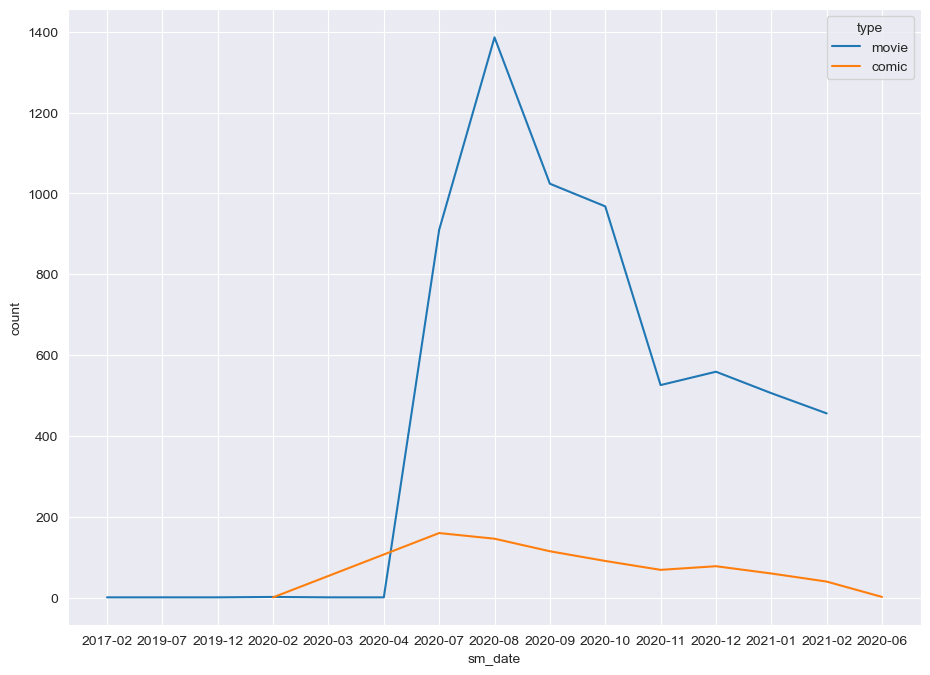

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=og_sm_dates0, x=og_sm_dates0['sm_date'], y=og_sm_dates0['count'], hue=og_sm_dates0['type'])
plt.show()

In [8]:
mu_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Mulan"))].sort_values(by='cached_count', ascending=False)['id'].values[0]
mu_tag2 = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Mulan"))].sort_values(by='cached_count', ascending=False)['id'].values[2]

In [9]:
mu_works = works.loc[(works['tags'].astype('string').str.contains(str(mu_tag)))]
mu_works['year'] = mu_works['creation date'].str[:4]
mu_works['month'] = mu_works['creation date'].str[5:7]
mu_works['sm_date'] = mu_works['creation date'].str[0:7]
mu_works.sort_values(by='sm_date')
mu_works2 = works.loc[(works['tags'].astype('string').str.contains(str(mu_tag2)))]
mu_works2['year'] = mu_works2['creation date'].str[:4]
mu_works2['month'] = mu_works2['creation date'].str[5:7]
mu_works2['sm_date'] = mu_works2['creation date'].str[0:7]
mu_works2.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\1107536620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mu_works['year'] = mu_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\1107536620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mu_works['month'] = mu_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\1107536620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
1852090,2020-01-26,en,False,True,957.0,11+19594+1860851+38530408+11746909+38530411+14...,NaN,2020,01,2020-01
1807762,2020-02-07,es,False,False,2274.0,11+154229+41332+19594+1860851+38530408+19593+2...,NaN,2020,02,2020-02
1703775,2020-03-04,en,False,True,318.0,13+1860851+116940+19594+38530408+39613294+1174...,NaN,2020,03,2020-03
1443432,2020-05-07,en,False,True,908.0,13+38530408+41885239+4844+38530411+1896+853+50...,NaN,2020,05,2020-05
1177416,2020-07-07,en,False,True,5449.0,13+38530408+41949631+11746909+41949619+1174691...,NaN,2020,07,2020-07
1012025,2020-08-08,en,False,True,4278.0,13+38530408+41949631+11746909+41949619+853+101...,NaN,2020,08,2020-08
1003504,2020-08-10,zh,False,True,4655.0,586439+1001939+38530408+110293+7267+80648+1174...,NaN,2020,08,2020-08
858131,2020-09-11,en,False,True,4527.0,11+38530408+47054737+11746909+41949619+4683824...,NaN,2020,09,2020-09
861715,2020-09-10,en,False,True,1706.0,10+38530408+47048893+4844+46850833+46850836+46...,NaN,2020,09,2020-09
862273,2020-09-10,en,False,False,44307.0,38530408+47051572+47050960+46838248+10487170+1...,NaN,2020,09,2020-09


In [10]:
mu_sm_dates = mu_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
mu_sm_dates2 = mu_works2['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

In [11]:
mu_sm_dates['vers'] = 'original'
mu_sm_dates2['vers'] = 'remake'
mu_sm_dates0 = pd.concat([mu_sm_dates, mu_sm_dates2])
mu_sm_dates0

,sm_date,count,vers
0,2009-11,1,original
1,2009-12,2,original
2,2010-04,2,original
3,2010-05,3,original
4,2010-07,1,original
...,...,...,...
7,2020-10,7,remake
8,2020-11,3,remake
9,2020-12,4,remake
10,2021-01,1,remake


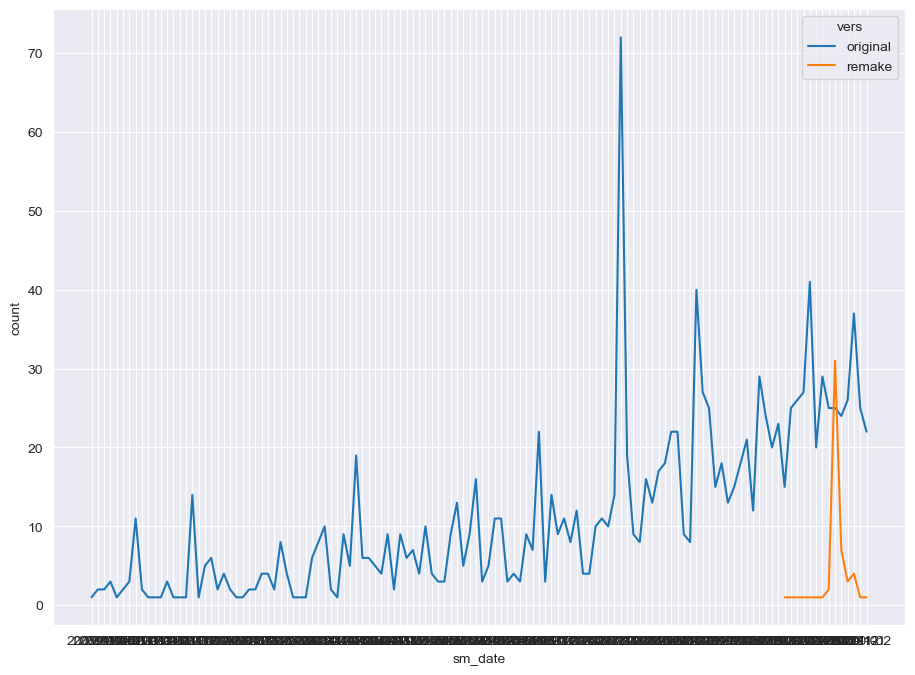

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=mu_sm_dates0, x=mu_sm_dates0['sm_date'], y=mu_sm_dates0['count'], hue=mu_sm_dates0['vers'])
plt.show()

In [16]:
hb1 = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Hellboy"))].sort_values(by='cached_count', ascending=False)['id'].values[0]
hb2 = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Hellboy"))].sort_values(by='cached_count', ascending=False)['id'].values[1]

In [17]:
hb1_works = works.loc[(works['tags'].astype('string').str.contains(str(hb1)))]
hb1_works['year'] = hb1_works['creation date'].str[:4]
hb1_works['month'] = hb1_works['creation date'].str[5:7]
hb1_works['sm_date'] = hb1_works['creation date'].str[0:7]
hb1_works.sort_values(by='sm_date')
hb2_works2 = works.loc[(works['tags'].astype('string').str.contains(str(hb2)))]
hb2_works2['year'] = hb2_works2['creation date'].str[:4]
hb2_works2['month'] = hb2_works2['creation date'].str[5:7]
hb2_works2['sm_date'] = hb2_works2['creation date'].str[0:7]
hb2_works2.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\2219672297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb1_works['year'] = hb1_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\2219672297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb1_works['month'] = hb1_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\2219672297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
7197175,2010-05-02,en,False,False,5575.0,11+1000+16+406+203+1346+21925+113052+199+2778+...,NaN,2010,05,2010-05
7153778,2010-12-09,en,False,True,7671.0,13+23+22965+120400+19550+25318+25554+25555+700...,NaN,2010,12,2010-12
7150296,2010-12-21,en,False,True,18036.0,13+23+14+62534+116416+25554+201288+120400+3112...,NaN,2010,12,2010-12
7083081,2011-07-14,en,False,True,4512.0,13+23+16+22965+120400+19550+56316+25318+25554+...,NaN,2011,07,2011-07
7053009,2011-10-09,en,False,True,53355.0,10+21+23+2246+24+14+116418+291609+25554+291604...,NaN,2011,10,2011-10
...,...,...,...,...,...,...,...,...,...,...
70021,2021-02-14,en,True,True,3.0,17959080+18958287+15096582+5678052+221556+2502...,NaN,2021,02,2021-02
33642,2021-02-20,en,False,False,3670.0,11+24557565+24557568+24557571+24557574+2691611...,NaN,2021,02,2021-02
21643,2021-02-22,en,False,False,3582.0,12+120400+31123354+45243184+31014242+15967998+...,NaN,2021,02,2021-02
16649,2021-02-23,en,False,False,12325.0,11+136512+20822+163914+1803+10980+1048+2211+15...,NaN,2021,02,2021-02


In [20]:
hb1_sm_dates = hb1_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
hb2_sm_dates2 = hb2_works2['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

In [21]:
hb1_sm_dates['vers'] = 'movies'
hb2_sm_dates2['vers'] = 'all'
hb_sm_dates0 = pd.concat([hb1_sm_dates, hb2_sm_dates2])
hb_sm_dates0

,sm_date,count,vers
0,2011-01,2,movies
1,2011-05,2,movies
2,2011-07,1,movies
3,2011-10,1,movies
4,2011-12,4,movies
...,...,...,...
88,2020-10,3,all
89,2020-11,3,all
90,2020-12,15,all
91,2021-01,8,all


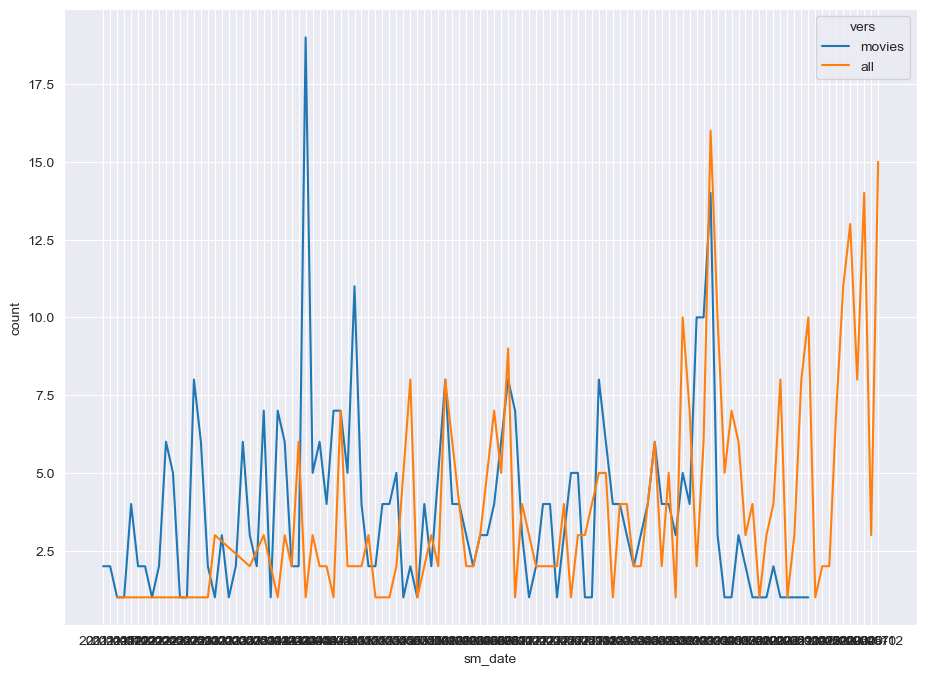

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=hb_sm_dates0, x=hb_sm_dates0['sm_date'], y=hb_sm_dates0['count'], hue=hb_sm_dates0['vers'])
plt.show()

In [31]:
fr_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Frozen"))].sort_values(by='cached_count', ascending=False)['id'].values[0]
fr_tag1 = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Frozen"))].sort_values(by='cached_count', ascending=False)['id'].values[1]

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\3181275602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_works['year'] = fr_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\3181275602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_works['month'] = fr_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21284\3181275602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

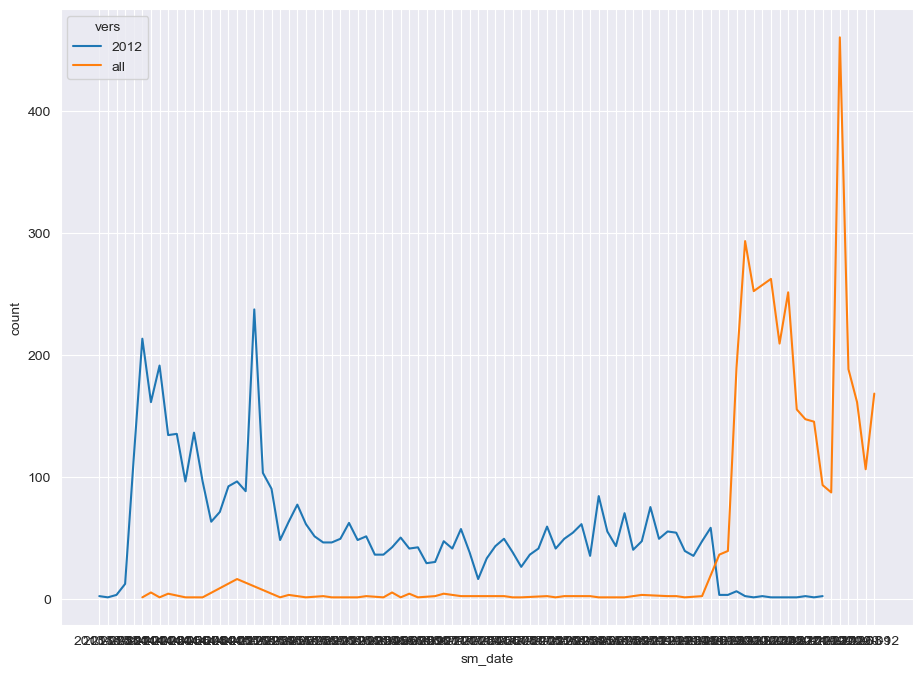

In [32]:
fr_works = works.loc[(works['tags'].astype('string').str.contains(str(fr_tag)))]
fr_works['year'] = fr_works['creation date'].str[:4]
fr_works['month'] = fr_works['creation date'].str[5:7]
fr_works['sm_date'] = fr_works['creation date'].str[0:7]
fr_works.sort_values(by='sm_date')
fr_works1 = works.loc[(works['tags'].astype('string').str.contains(str(fr_tag1)))]
fr_works1['year'] = fr_works1['creation date'].str[:4]
fr_works1['month'] = fr_works1['creation date'].str[5:7]
fr_works1['sm_date'] = fr_works1['creation date'].str[0:7]
fr_works1.sort_values(by='sm_date')

fr_sm_dates = fr_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
fr_sm_dates1 = fr_works1['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

fr_sm_dates['vers'] = '2012'
fr_sm_dates1['vers'] = 'all'
fr_sm_dates0 = pd.concat([fr_sm_dates, fr_sm_dates1])
fr_sm_dates0

sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=fr_sm_dates0, x=fr_sm_dates0['sm_date'], y=fr_sm_dates0['count'], hue=fr_sm_dates0['vers'])
plt.show()

In [30]:
tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Frozen"))].sort_values(by='cached_count', ascending=False)

,id,type,name,canonical,cached_count,merger_id
653007,966650,Fandom,Frozen (2013),False,5056,33819955.0
8807643,33819955,Fandom,Frozen (Disney Movies),True,3870,NaN
816096,1180096,Fandom,Frozen - Fandom,False,211,33819955.0
7759795,29655740,Fandom,Frozen 2 - Fandom,False,99,33819955.0
7725824,29516813,Fandom,Frozen - Anderson-Lopez & Lopez/Lee,True,64,NaN
9556437,36756256,Fandom,Frozen II (Disney Movies),False,20,33819955.0
1155702,2139305,Fandom,Gundam Wing Frozen Teardrop,False,7,5032.0
3695775,12803452,Fandom,Frozen (US 2010),True,7,NaN
7445560,28403351,Fandom,"Wendy's ""Always Fresh Never Frozen"" Commercials",True,3,NaN
11067475,42586501,Fandom,Frozen (Disney Movies) RPF,True,3,NaN
